In [1]:
### 1. Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings  # to avoid warnings messages before code
warnings.filterwarnings('ignore')
import scipy.stats as stats
from sklearn.impute import SimpleImputer

In [2]:
### 2 Load Dataset for Analysis purpose
file_path = 'Country-Code.xlsx'
data1 = pd.read_excel(file_path)
data1

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [3]:
data2= pd.read_csv('Zomato Restaurant.csv')
data2.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
### Merging data sets
zomato=pd.merge (data1,data2) 

In [5]:
zomato.head(5)

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


In [6]:
# Check data types and missing values
print(zomato.info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9542 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

In [7]:
# Basic statistics of numeric columns
print(zomato.describe())

       Country Code  Restaurant ID    Longitude     Latitude  \
count   9551.000000   9.551000e+03  9551.000000  9551.000000   
mean      18.365616   9.051128e+06    64.126574    25.854381   
std       56.750546   8.791521e+06    41.467058    11.007935   
min        1.000000   5.300000e+01  -157.948486   -41.330428   
25%        1.000000   3.019625e+05    77.081343    28.478713   
50%        1.000000   6.004089e+06    77.191964    28.570469   
75%        1.000000   1.835229e+07    77.282006    28.642758   
max      216.000000   1.850065e+07   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

In [8]:
# Check for missing values
print(zomato.isnull().sum())

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [9]:
# Remove duplicates
zomato.drop_duplicates(inplace=True)

In [10]:
(zomato.groupby('Rating color').mean()['Votes'])

Rating color
Dark Green    851.770764
Green         520.458758
Orange         48.249130
Red            90.715054
White           0.870112
Yellow        229.351429
Name: Votes, dtype: float64

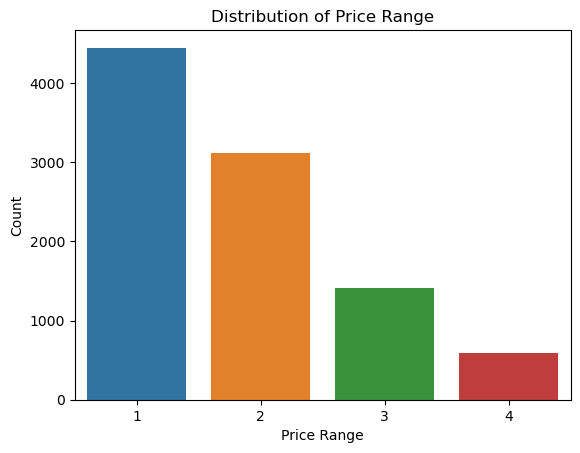

In [11]:
# Countplot of Price Range
sns.countplot(data=zomato, x='Price range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Distribution of Price Range')
plt.show()

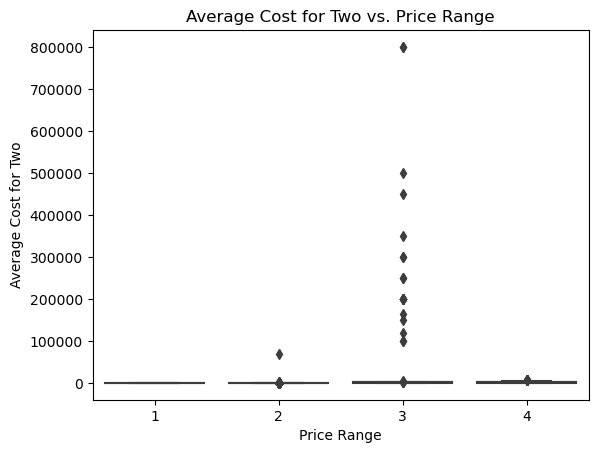

In [12]:
# Box plot of Average Cost for Two vs. Price Range
sns.boxplot(data=zomato, x='Price range', y='Average Cost for two')
plt.xlabel('Price Range')
plt.ylabel('Average Cost for Two')
plt.title('Average Cost for Two vs. Price Range')
plt.show()

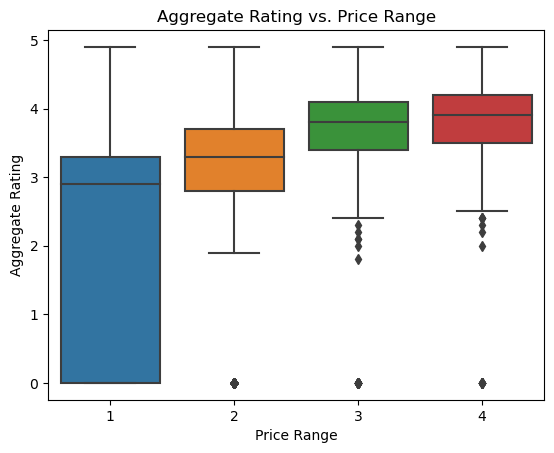

In [13]:
# Box plot of Aggregate Rating vs. Price Range
sns.boxplot(data=zomato, x='Price range', y='Aggregate rating')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.title('Aggregate Rating vs. Price Range')
plt.show()


In [14]:
# List of categorical features
categorical_features = zomato.select_dtypes(include=['object']).columns

# List of numerical vaules features
numerical_features = zomato.select_dtypes(include=['int','float']).columns


In [15]:
categorical_features

Index(['Country', 'Restaurant Name', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Rating color', 'Rating text'],
      dtype='object')

Text(0.5, 1.0, 'Average Cost for Two by Online Delivery')

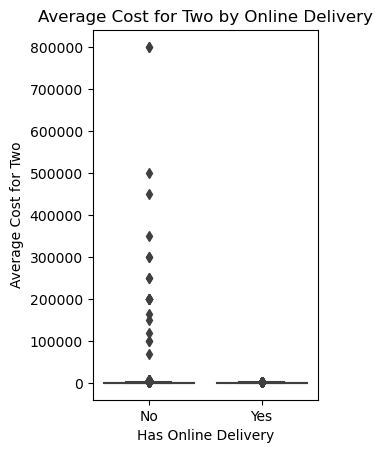

In [16]:
plt.subplot(1, 2, 2)
sns.boxplot(data=zomato, x='Has Online delivery', y='Average Cost for two')
plt.xlabel('Has Online Delivery')
plt.ylabel('Average Cost for Two')
plt.title('Average Cost for Two by Online Delivery')

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140]),
 [Text(0, 0, 'Agra'),
  Text(1, 0, 'Ahmedabad'),
  Text(2, 0, 'Allahabad'),
  Text(3, 0, 'Amritsar'),
  Text(4, 0, 'Aurangabad'),
  Text(5, 0, 'Bangalore'),
  Text(6, 0, 'Bhopal'),
  Text(7, 0, 'Bhubaneshw

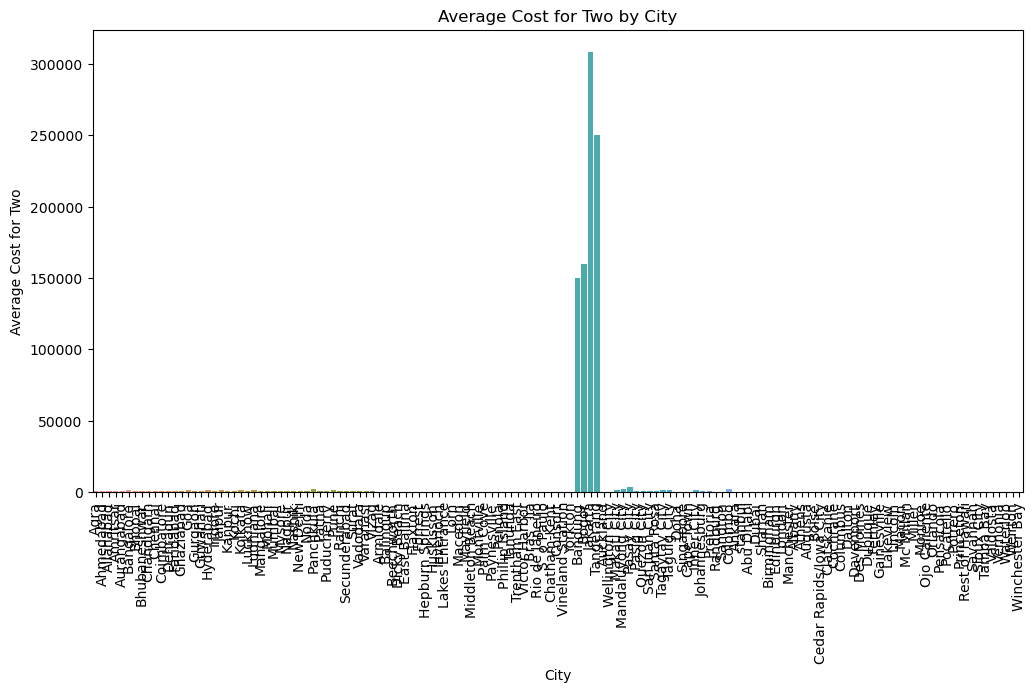

In [17]:
# City analysis
plt.figure(figsize=(12, 6))
sns.barplot(data=zomato, x='City', y='Average Cost for two', ci=None)
plt.xlabel('City')
plt.ylabel('Average Cost for Two')
plt.title('Average Cost for Two by City')
plt.xticks(rotation=90)

<Axes: ylabel='Price range'>

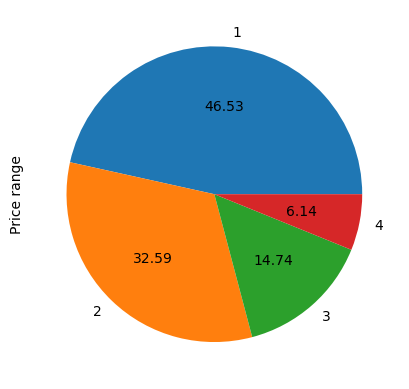

In [18]:
# Percentage count of Price range
zomato['Price range'].value_counts().plot(kind='pie', autopct = '%.2f')

<Axes: xlabel='Rating text', ylabel='Votes'>

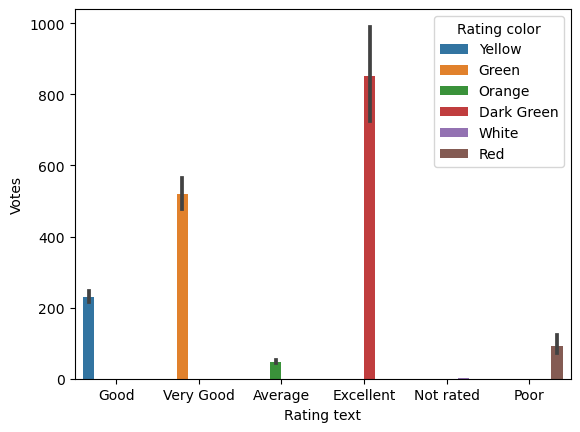

In [19]:
sns.barplot(x=zomato["Rating text"],y=zomato["Votes"],hue =zomato["Rating color"])

<Axes: xlabel='Aggregate rating', ylabel='Density'>

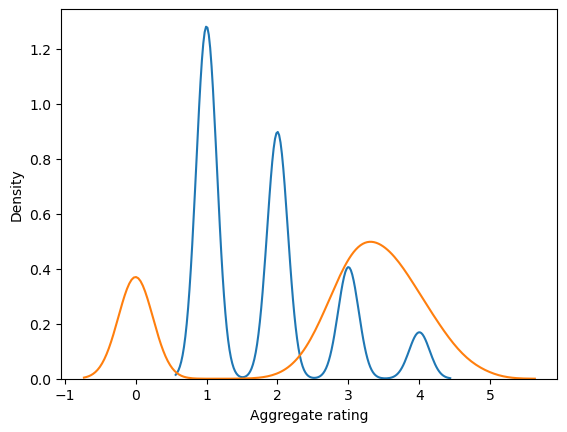

In [20]:
sns.distplot(zomato["Price range"], hist= False)
sns.distplot(zomato["Aggregate rating"], hist= False)

In [24]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to specific columns
zomato['Has Table booking'] = label_encoder.fit_transform(zomato['Has Table booking'])
zomato['Has Online delivery'] = label_encoder.fit_transform(zomato['Has Online delivery'])
zomato['Is delivering now'] = label_encoder.fit_transform(zomato['Is delivering now'])


### Machine Learning Model Building

In [27]:
# Import important libraries for model building

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [28]:
# Split the data into features (X) and target variables (y)
# Define a list of non-numeric columns to exclude
non_numeric_columns = ['Country', 'Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Switch to order menu', 'Rating color', 'Rating text']

# Exclude non-numeric columns from your feature set
X = zomato.drop(['Average Cost for two', 'Price range'] + non_numeric_columns, axis=1)

y_avg_cost = zomato['Average Cost for two']
y_price_range = zomato['Price range']


In [29]:
# Check the available column names in the dataset
print(zomato.columns)


Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [30]:
# Split the data into training and testing sets
X_train, X_test, y_avg_cost_train, y_avg_cost_test, y_price_range_train, y_price_range_test = train_test_split(X, y_avg_cost, y_price_range, test_size=0.2, random_state=42)



In [31]:
# Random Forest Regressor for Average Cost for Two
avg_cost_model = RandomForestRegressor(n_estimators=100, random_state=42)
avg_cost_model.fit(X_train, y_avg_cost_train)



RandomForestRegressor(random_state=42)

In [33]:
# Make predictions
avg_cost_predictions = avg_cost_model.predict(X_test)

In [36]:
# Evaluate the models
from sklearn.metrics import mean_absolute_error, accuracy_score
avg_cost_mae = mean_absolute_error(y_avg_cost_test, avg_cost_predictions)
print("Average Cost for Two Model - MAE: {:.2f}".format(avg_cost_mae))

Average Cost for Two Model - MAE: 676.65


In [38]:
# Save the final models
final_avg_cost_model = avg_cost_model

In [40]:
# Random Forest Classifier for Price Range
price_range_model = RandomForestClassifier(n_estimators=100, random_state=42)
price_range_model.fit(X_train, y_price_range_train)

RandomForestClassifier(random_state=42)

In [41]:
price_range_predictions = price_range_model.predict(X_test)


In [42]:
price_range_accuracy = accuracy_score(y_price_range_test, price_range_predictions)

In [43]:
print("Price Range Model - Accuracy: {:.2f}".format(price_range_accuracy))

Price Range Model - Accuracy: 0.58


In [44]:
final_price_range_model = price_range_model